### Module 1 - Data Preprocessing

In [1]:
#imports

import os
from glob import glob
import numpy as npqs
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv(r"C:\Users\nithi\Downloads\Flight Data-20230820T061419Z-001\Flight Data\2016_original\2016\On_Time_On_Time_Performance_2016_1\On_Time_On_Time_Performance_2016_1.csv")

C:\Users\nithi\AppData\Local\Temp\ipykernel_8320\1322655290.py:1: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\nithi\Downloads\Flight Data-20230820T061419Z-001\Flight Data\2016_original\2016\On_Time_On_Time_Performance_2016_1\On_Time_On_Time_Performance_2016_1.csv")


In [3]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445822,2016,1,1,3,7,2016-01-03,F9,20436,F9,N934FR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445823,2016,1,1,3,7,2016-01-03,F9,20436,F9,N934FR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445824,2016,1,1,3,7,2016-01-03,F9,20436,F9,N935FR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445825,2016,1,1,3,7,2016-01-03,F9,20436,F9,N935FR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.columns.to_list())

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum', 'FlightNum', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime', 'DivAirportLandings', 'DivReachedDest', 'Div

In [5]:
for i in df.columns:
    if df[i].isin(["ATL"]).any():
        print(df[i])

0         DFW
1         DFW
2         DFW
3         DFW
4         DFW
         ... 
445822    DEN
445823    DEN
445824    DEN
445825    FSD
445826    CID
Name: Origin, Length: 445827, dtype: object
0         DTW
1         DTW
2         DTW
3         DTW
4         DTW
         ... 
445822    SLC
445823    DCA
445824    FSD
445825    DEN
445826    DEN
Name: Dest, Length: 445827, dtype: object
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
445822    NaN
445823    NaN
445824    NaN
445825    NaN
445826    NaN
Name: Div1Airport, Length: 445827, dtype: object


In [6]:
import os
PATH = r"C:\Users\nithi\Downloads\Flight Data-20230820T061419Z-001\Flight Data"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
print(all_csv_files)

['C:\\Users\\nithi\\Downloads\\Flight Data-20230820T061419Z-001\\Flight Data\\2016_original\\2016\\On_Time_On_Time_Performance_2016_1\\On_Time_On_Time_Performance_2016_1.csv', 'C:\\Users\\nithi\\Downloads\\Flight Data-20230820T061419Z-001\\Flight Data\\2016_original\\2016\\On_Time_On_Time_Performance_2016_10\\On_Time_On_Time_Performance_2016_10.csv', 'C:\\Users\\nithi\\Downloads\\Flight Data-20230820T061419Z-001\\Flight Data\\2016_original\\2016\\On_Time_On_Time_Performance_2016_11\\On_Time_On_Time_Performance_2016_11.csv', 'C:\\Users\\nithi\\Downloads\\Flight Data-20230820T061419Z-001\\Flight Data\\2016_original\\2016\\On_Time_On_Time_Performance_2016_12\\On_Time_On_Time_Performance_2016_12.csv', 'C:\\Users\\nithi\\Downloads\\Flight Data-20230820T061419Z-001\\Flight Data\\2016_original\\2016\\On_Time_On_Time_Performance_2016_2\\On_Time_On_Time_Performance_2016_2.csv', 'C:\\Users\\nithi\\Downloads\\Flight Data-20230820T061419Z-001\\Flight Data\\2016_original\\2016\\On_Time_On_Time_Perf

In [7]:
frames = []
#print(frames)
for i in all_csv_files:
    df = pd.read_csv(i)
    frames.append(df)
print(frames)

C:\Users\nithi\AppData\Local\Temp\ipykernel_8320\2531269336.py:4: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8320\2531269336.py:4: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8320\2531269336.py:4: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8320\2531269336.py:4: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)
C:\Users\nithi\AppData\Local\Temp\ipykernel_8320\2531269336.py:4: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)
C:\Users\nithi\AppData\Local

[        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0       2016        1      1           6          3  2016-01-06            AA   
1       2016        1      1           7          4  2016-01-07            AA   
2       2016        1      1           8          5  2016-01-08            AA   
3       2016        1      1           9          6  2016-01-09            AA   
4       2016        1      1          10          7  2016-01-10            AA   
...      ...      ...    ...         ...        ...         ...           ...   
445822  2016        1      1           3          7  2016-01-03            F9   
445823  2016        1      1           3          7  2016-01-03            F9   
445824  2016        1      1           3          7  2016-01-03            F9   
445825  2016        1      1           3          7  2016-01-03            F9   
445826  2016        1      1           3          7  2016-01-03            F9   

        AirlineID Carrier 

In [8]:
result = pd.concat(frames)

In [9]:
result

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458722,2017,3,9,25,1,2017-09-25,B6,20409,B6,N216JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458723,2017,3,9,25,1,2017-09-25,B6,20409,B6,N651JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458724,2017,3,9,25,1,2017-09-25,B6,20409,B6,N265JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458725,2017,3,9,25,1,2017-09-25,B6,20409,B6,N298JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns = ['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest','DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes']

In [11]:
airport_codes = ['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']

In [12]:
new_df = result[columns]

In [13]:
air_df = new_df[new_df["Origin"].isin(airport_codes)]
air_df = new_df[new_df["Dest"].isin(airport_codes)]

In [14]:
air_df.shape

(5055592, 17)

In [15]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5055592 entries, 26 to 458721
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FlightDate       object 
 1   Quarter          int64  
 2   Year             int64  
 3   Month            int64  
 4   Origin           object 
 5   Dest             object 
 6   DayofMonth       int64  
 7   DepTime          float64
 8   DepDel15         float64
 9   CRSDepTime       int64  
 10  DepDelayMinutes  float64
 11  OriginAirportID  int64  
 12  DestAirportID    int64  
 13  ArrTime          float64
 14  CRSArrTime       int64  
 15  ArrDel15         float64
 16  ArrDelayMinutes  float64
dtypes: float64(6), int64(8), object(3)
memory usage: 694.3+ MB


In [16]:
air_df.isna().sum()

FlightDate             0
Quarter                0
Year                   0
Month                  0
Origin                 0
Dest                   0
DayofMonth             0
DepTime            64651
DepDel15           64668
CRSDepTime             0
DepDelayMinutes    64668
OriginAirportID        0
DestAirportID          0
ArrTime            67520
CRSArrTime             0
ArrDel15           78567
ArrDelayMinutes    78567
dtype: int64

In [17]:
print(air_df.isnull().values.sum())

418641


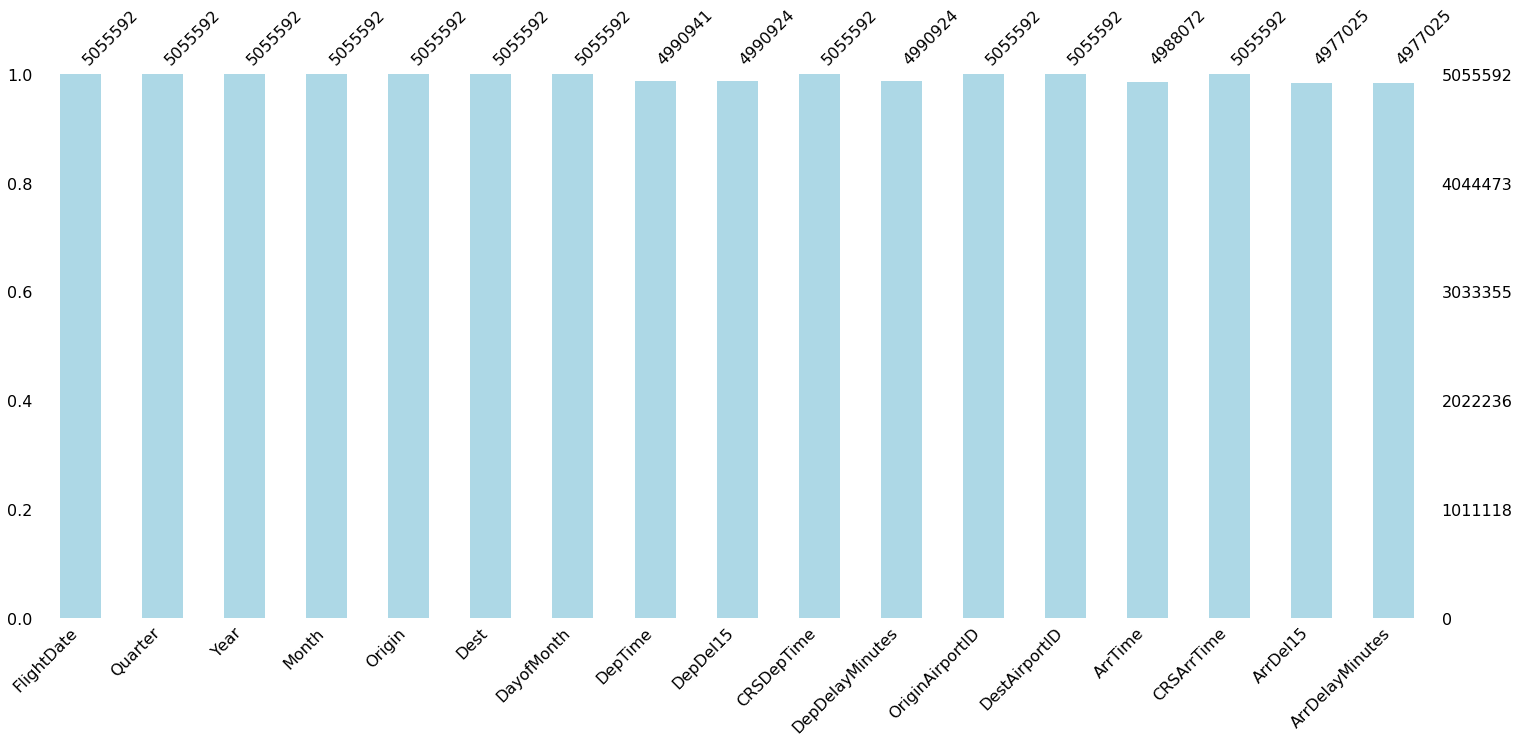

In [18]:
plt.figure(figsize = (8, 20))
msno.bar(air_df, color = 'lightblue');

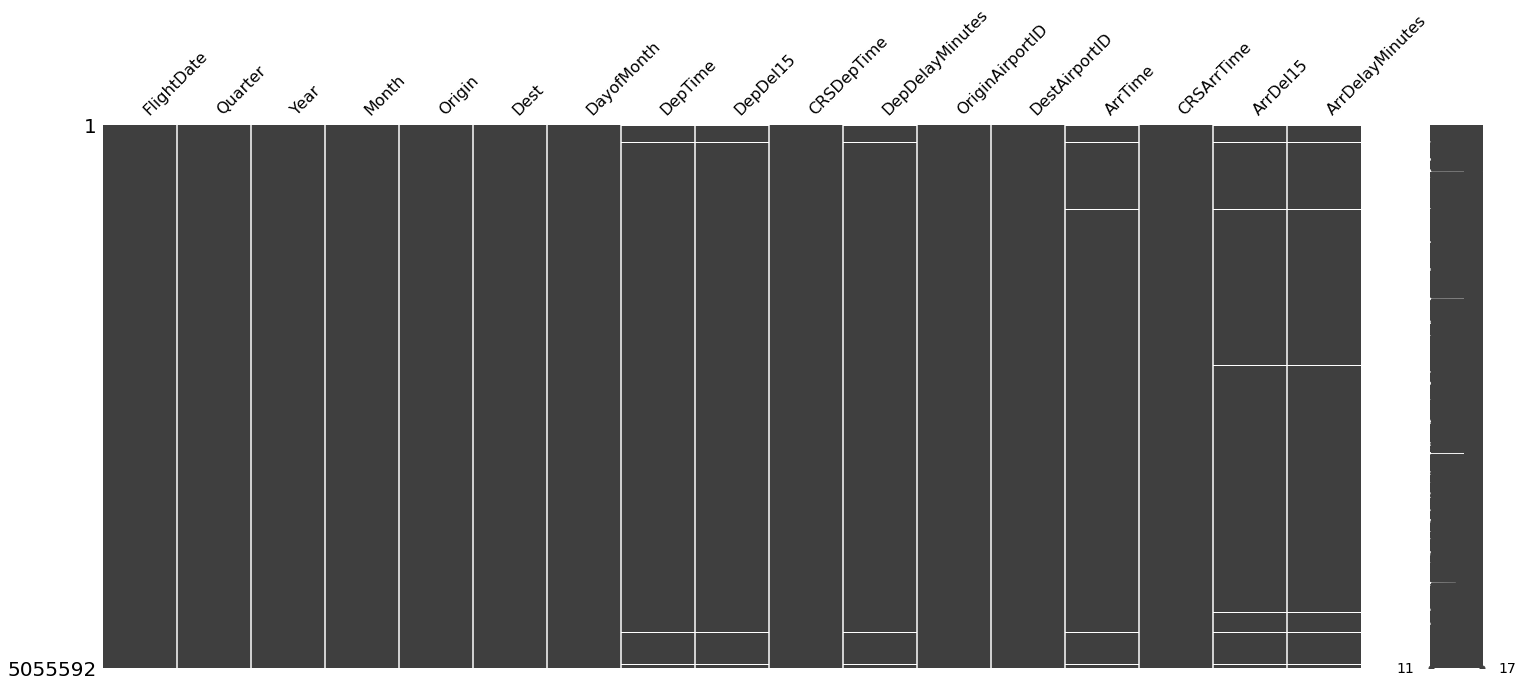

In [19]:
msno.matrix(air_df);

In [20]:
air_df = air_df.dropna(how = "any", axis = 0)

In [21]:
air_df.shape

(4977025, 17)

In [22]:
air_df = air_df.drop_duplicates()

In [23]:
air_df.shape

(4977016, 17)

In [24]:
air_df = air_df.reset_index()

In [27]:
air_df = air_df.drop('index', axis = 1)

In [28]:
air_df.head()

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes
0,2016-01-01,1,2016,1,DTW,DFW,1,1539.0,1.0,1513,26.0,11433,11298,1756.0,1724,1.0,32.0
1,2016-01-02,1,2016,1,DTW,DFW,2,1509.0,0.0,1513,0.0,11433,11298,1651.0,1724,0.0,0.0
2,2016-01-03,1,2016,1,DTW,DFW,3,1515.0,0.0,1513,2.0,11433,11298,1703.0,1724,0.0,0.0
3,2016-01-04,1,2016,1,DTW,DFW,4,1509.0,0.0,1513,0.0,11433,11298,1641.0,1724,0.0,0.0
4,2016-01-05,1,2016,1,DTW,DFW,5,1519.0,0.0,1523,0.0,11433,11298,1708.0,1730,0.0,0.0


In [29]:
air_df.tail()

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes
4977011,2017-09-25,3,2017,9,BOS,DEN,25,1952.0,0.0,1945,7.0,10721,11292,2215.0,2219,0.0,0.0
4977012,2017-09-25,3,2017,9,BOS,ATL,25,2130.0,1.0,2102,28.0,10721,10397,11.0,2352,1.0,19.0
4977013,2017-09-25,3,2017,9,BUF,JFK,25,2103.0,0.0,2118,0.0,10792,12478,2213.0,2246,0.0,0.0
4977014,2017-09-25,3,2017,9,LGB,SEA,25,1505.0,0.0,1500,5.0,12954,14747,1750.0,1740,0.0,10.0
4977015,2017-09-25,3,2017,9,BOS,ORD,25,1734.0,0.0,1720,14.0,10721,13930,1924.0,1913,0.0,11.0


In [30]:
new = pd.read_json(r"C:\Users\nithi\Downloads\weather-20230820T062846Z-001\weather\ATL\2013-1.json")

In [31]:
dummy = new["data"]["weather"]

dummy_df = pd.DataFrame(dummy)
dummy_df

,mintempC,maxtempF,sunHour,mintempF,maxtempC,hourly,totalSnow_cm,date,astronomy,uvIndex
0,8,56,7.5,46,14,"[{'windspeedKmph': '4', 'FeelsLikeF': '46', 'w...",0.0,2013-01-01,"[{'moon_phase': 'Full Moon', 'moonrise': '10:5...",0
1,6,55,9.8,42,13,"[{'windspeedKmph': '9', 'FeelsLikeF': '45', 'w...",0.0,2013-01-02,"[{'moon_phase': 'Full Moon', 'moonrise': '11:5...",0
2,6,49,10.0,43,10,"[{'windspeedKmph': '11', 'FeelsLikeF': '41', '...",0.0,2013-01-03,"[{'moon_phase': 'Full Moon', 'moonrise': 'No m...",0
3,2,53,10.0,35,11,"[{'windspeedKmph': '8', 'FeelsLikeF': '37', 'w...",0.0,2013-01-04,"[{'moon_phase': 'Full Moon', 'moonrise': '12:5...",0
4,-2,52,10.0,29,11,"[{'windspeedKmph': '10', 'FeelsLikeF': '42', '...",0.0,2013-01-05,"[{'moon_phase': 'Waning Gibbous', 'moonrise': ...",0
5,4,53,8.8,40,12,"[{'windspeedKmph': '3', 'FeelsLikeF': '42', 'w...",0.0,2013-01-06,"[{'moon_phase': 'Waning Gibbous', 'moonrise': ...",0
6,3,60,10.0,38,16,"[{'windspeedKmph': '14', 'FeelsLikeF': '40', '...",0.0,2013-01-07,"[{'moon_phase': 'Waning Gibbous', 'moonrise': ...",0
7,6,50,7.5,42,10,"[{'windspeedKmph': '13', 'FeelsLikeF': '42', '...",0.0,2013-01-08,"[{'moon_phase': 'Waning Gibbous', 'moonrise': ...",0
8,10,70,8.0,49,21,"[{'windspeedKmph': '8', 'FeelsLikeF': '46', 'w...",0.0,2013-01-09,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0
9,15,63,7.5,59,17,"[{'windspeedKmph': '6', 'FeelsLikeF': '60', 'w...",0.0,2013-01-10,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0


In [32]:
print(type(dummy))

<class 'list'>


In [33]:
dummy_df.columns

Index(['mintempC', 'maxtempF', 'sunHour', 'mintempF', 'maxtempC', 'hourly',
       'totalSnow_cm', 'date', 'astronomy', 'uvIndex'],
      dtype='object')

In [34]:
dummy_df['hourly'][0]

[{'windspeedKmph': '4',
  'FeelsLikeF': '46',
  'winddir16Point': 'ENE',
  'FeelsLikeC': '8',
  'DewPointC': '-2',
  'windspeedMiles': '2',
  'DewPointF': '29',
  'HeatIndexF': '48',
  'cloudcover': '51',
  'HeatIndexC': '9',
  'precipMM': '0.0',
  'weatherIconUrl': [{'value': 'http://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0004_black_low_cloud.png'}],
  'WindGustMiles': '10',
  'pressure': '1022',
  'WindGustKmph': '16',
  'weatherDesc': [{'value': 'Cloudy'}],
  'visibility': '10',
  'weatherCode': '119',
  'tempC': '3',
  'tempF': '37',
  'WindChillF': '46',
  'WindChillC': '8',
  'winddirDegree': '65',
  'humidity': '75',
  'time': '0'},
 {'windspeedKmph': '6',
  'FeelsLikeF': '45',
  'winddir16Point': 'ESE',
  'FeelsLikeC': '7',
  'DewPointC': '1',
  'windspeedMiles': '4',
  'DewPointF': '33',
  'HeatIndexF': '47',
  'cloudcover': '46',
  'HeatIndexC': '9',
  'precipMM': '0.0',
  'weatherIconUrl': [{'value': 'http://cdn.worldweatheronline.net/images/wsymbols01_p

In [35]:
wind_df = pd.json_normalize(dummy, record_path = 'hourly', meta = 'date')

In [36]:
wind_df

,windspeedKmph,FeelsLikeF,winddir16Point,FeelsLikeC,DewPointC,windspeedMiles,DewPointF,HeatIndexF,cloudcover,HeatIndexC,...,visibility,weatherCode,tempC,tempF,WindChillF,WindChillC,winddirDegree,humidity,time,date
0,4,46,ENE,8,-2,2,29,48,51,9,...,10,119,3,37,46,8,65,75,0,2013-01-01
1,6,45,ESE,7,1,4,33,47,46,9,...,9,119,5,40,45,7,108,79,100,2013-01-01
2,8,43,SSE,6,3,5,38,46,41,8,...,8,113,6,43,43,6,151,83,200,2013-01-01
3,10,42,SSW,6,6,6,42,46,36,8,...,7,113,8,46,42,6,194,87,300,2013-01-01
4,9,42,SSW,6,6,6,43,45,48,7,...,5,113,7,45,42,6,192,90,400,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,20,41,WNW,5,-7,13,19,46,0,8,...,10,113,7,44,41,5,282,51,1900,2013-01-31
740,17,40,W,5,-7,10,20,45,1,7,...,10,113,6,43,40,5,278,55,2000,2013-01-31
741,13,40,W,4,-7,8,20,44,1,7,...,10,113,5,42,40,4,273,59,2100,2013-01-31
742,13,37,W,3,-6,8,21,43,2,6,...,10,113,5,41,37,3,266,62,2200,2013-01-31


In [37]:
wind_df.columns

Index(['windspeedKmph', 'FeelsLikeF', 'winddir16Point', 'FeelsLikeC',
       'DewPointC', 'windspeedMiles', 'DewPointF', 'HeatIndexF', 'cloudcover',
       'HeatIndexC', 'precipMM', 'weatherIconUrl', 'WindGustMiles', 'pressure',
       'WindGustKmph', 'weatherDesc', 'visibility', 'weatherCode', 'tempC',
       'tempF', 'WindChillF', 'WindChillC', 'winddirDegree', 'humidity',
       'time', 'date'],
      dtype='object')

In [38]:
wind_df['DewPointC']

0      -2
1       1
2       3
3       6
4       6
       ..
739    -7
740    -7
741    -7
742    -6
743    -5
Name: DewPointC, Length: 744, dtype: object

In [39]:
PATH = r"C:\Users\nithi\Downloads\weather-20230820T062846Z-001\weather"
EXT = "*.json"
all_json_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [40]:
print(all_json_files)

['C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-1.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-10.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-11.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-12.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-2.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-3.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-4.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-5.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-6.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-7.json', 'C:\\Users\\nithi\\Downloads\\weather-20230820T062846Z-001\\weather\\ATL\\2013-8.json', 'C:\\Users\\nithi\\Downloads

In [51]:
for i in all_json_files:
    parts = i.split(os.path.sep)
    print(parts[-2])

ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
CLT
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DEN
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
DFW
EWR
EWR
EWR
EWR
EWR
EWR
EWR
EWR
EWR
EWR


In [53]:
all_wind = []
for i in all_json_files:
    new = pd.read_json(i)
    parts = i.split(os.path.sep)
    dummy = new["data"]["weather"]
    wind_df = pd.json_normalize(dummy, record_path = 'hourly', meta = 'date')
    wind_df['airport_code'] = parts[-2]
    all_wind.append(wind_df)

In [54]:
result = pd.concat(all_wind)

In [55]:
result

,windspeedKmph,FeelsLikeF,winddir16Point,FeelsLikeC,DewPointC,windspeedMiles,DewPointF,HeatIndexF,cloudcover,HeatIndexC,...,weatherCode,tempC,tempF,WindChillF,WindChillC,winddirDegree,humidity,time,date,airport_code
0,4,46,ENE,8,-2,2,29,48,51,9,...,119,3,37,46,8,65,75,0,2013-01-01,ATL
1,6,45,ESE,7,1,4,33,47,46,9,...,119,5,40,45,7,108,79,100,2013-01-01,ATL
2,8,43,SSE,6,3,5,38,46,41,8,...,113,6,43,43,6,151,83,200,2013-01-01,ATL
3,10,42,SSW,6,6,6,42,46,36,8,...,113,8,46,42,6,194,87,300,2013-01-01,ATL
4,9,42,SSW,6,6,6,43,45,48,7,...,113,7,45,42,6,192,90,400,2013-01-01,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,26,67,WNW,20,14,16,57,67,0,20,...,113,20,67,67,20,296,70,1900,2017-09-30,SFO
716,26,67,WNW,19,14,16,58,67,0,19,...,113,19,67,67,19,298,71,2000,2017-09-30,SFO
717,26,67,WNW,19,14,16,58,67,0,19,...,113,19,67,67,19,300,73,2100,2017-09-30,SFO
718,23,66,WNW,19,14,14,58,66,0,19,...,113,19,66,66,19,302,74,2200,2017-09-30,SFO


In [56]:
result.to_csv('weather.csv')

In [45]:
air_df.to_csv('flights.csv')